# Problem 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR

from sklearn.datasets import load_breast_cancer

dataset = load_breast_cancer()
df = pd.DataFrame(dataset.data, columns=dataset.feature_names) # now the DataFrame is saved into a DataFrame object
df.shape


(569, 30)

In [2]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
# now scale the data

x = df # is the data features in a DataFrame
y = dataset.target # is the data target column in an arrary format


In [4]:
iterations = 25
X_1 = np.zeros(iterations+1)
X_2 = np.zeros(iterations+1)
X_3 = np.zeros(iterations+1)
X_4 = np.zeros(iterations+1)

for i in range(1,iterations+1):
    print(i, 'iteration')
     
    pca = PCA(n_components=i)
    
    X_pca = pca.fit_transform(x)
    
    
    X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, train_size=0.8,test_size=0.2,random_state=42)
    
    scaler = StandardScaler()
    X_train_pca = scaler.fit_transform(X_train_pca)
    X_test_pca = scaler.fit_transform(X_test_pca)
    
    model = SVC(kernel='linear', C=1)
    model.fit(X_train_pca,y_train)
    Y_pred = model.predict(X_test_pca)
    print(metrics.classification_report(y_test, Y_pred))
    print('linear accuracy', metrics.accuracy_score(y_test, Y_pred))
    X_1[i] = metrics.accuracy_score(y_test, Y_pred)
    
    model = SVC(kernel='poly', C=1)
    model.fit(X_train_pca,y_train)
    Y_pred = model.predict(X_test_pca)
    print(metrics.classification_report(y_test, Y_pred))
    print('poly accuracy', metrics.accuracy_score(y_test, Y_pred))
    X_2[i] = metrics.accuracy_score(y_test, Y_pred)
    
    model = SVC(kernel='rbf', C=1)
    model.fit(X_train_pca,y_train)
    Y_pred = model.predict(X_test_pca)
    print(metrics.classification_report(y_test, Y_pred))
    print('rbf accuracy', metrics.accuracy_score(y_test, Y_pred))
    X_3[i] = metrics.accuracy_score(y_test, Y_pred)
    
    model = SVC(kernel='sigmoid', C=1)
    model.fit(X_train_pca,y_train)
    Y_pred = model.predict(X_test_pca)
    print(metrics.classification_report(y_test, Y_pred))
    print('sigmoid accuracy', metrics.accuracy_score(y_test, Y_pred))
    X_4[i] = metrics.accuracy_score(y_test, Y_pred)
    
    

1 iteration
              precision    recall  f1-score   support

           0       1.00      0.86      0.92        43
           1       0.92      1.00      0.96        71

    accuracy                           0.95       114
   macro avg       0.96      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114

linear accuracy 0.9473684210526315
              precision    recall  f1-score   support

           0       1.00      0.63      0.77        43
           1       0.82      1.00      0.90        71

    accuracy                           0.86       114
   macro avg       0.91      0.81      0.84       114
weighted avg       0.89      0.86      0.85       114

poly accuracy 0.8596491228070176
              precision    recall  f1-score   support

           0       1.00      0.86      0.92        43
           1       0.92      1.00      0.96        71

    accuracy                           0.95       114
   macro avg       0.96      0.93      0.94     

              precision    recall  f1-score   support

           0       0.97      0.91      0.94        43
           1       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

rbf accuracy 0.956140350877193
              precision    recall  f1-score   support

           0       0.97      0.91      0.94        43
           1       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

sigmoid accuracy 0.956140350877193
10 iteration
              precision    recall  f1-score   support

           0       0.97      0.88      0.93        43
           1       0.93      0.99      0.96        71

    accuracy                           0.95       114
   macro avg       0.95      0.93      0.94      

              precision    recall  f1-score   support

           0       0.95      0.93      0.94        43
           1       0.96      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

linear accuracy 0.956140350877193
              precision    recall  f1-score   support

           0       0.96      0.58      0.72        43
           1       0.80      0.99      0.88        71

    accuracy                           0.83       114
   macro avg       0.88      0.78      0.80       114
weighted avg       0.86      0.83      0.82       114

poly accuracy 0.8333333333333334
              precision    recall  f1-score   support

           0       0.95      0.91      0.93        43
           1       0.95      0.97      0.96        71

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighte

Text(0.5, 1.0, 'Linear Kernel')

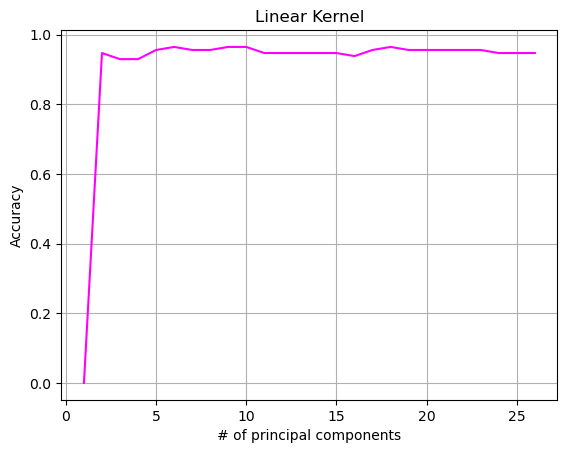

In [5]:
plt.plot(range(1, iterations + 2), X_1, color='magenta')
plt.grid()
plt.xlabel('# of principal components')
plt.ylabel('Accuracy')
plt.title('Linear Kernel')

Text(0.5, 1.0, 'polynomial Kernel')

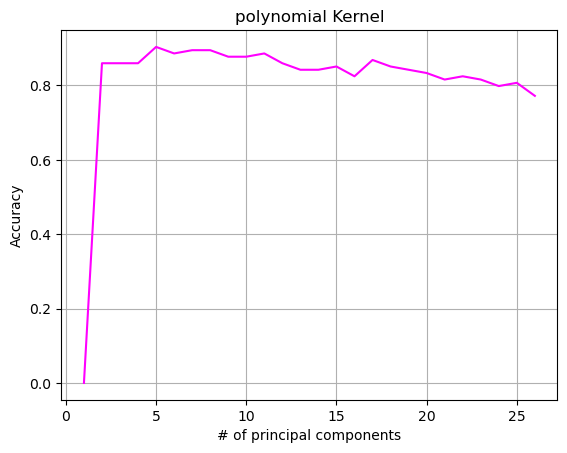

In [6]:
plt.plot(range(1, iterations + 2), X_2, color='magenta')
plt.grid()
plt.xlabel('# of principal components')
plt.ylabel('Accuracy')
plt.title('polynomial Kernel')

Text(0.5, 1.0, 'rbf Kernel')

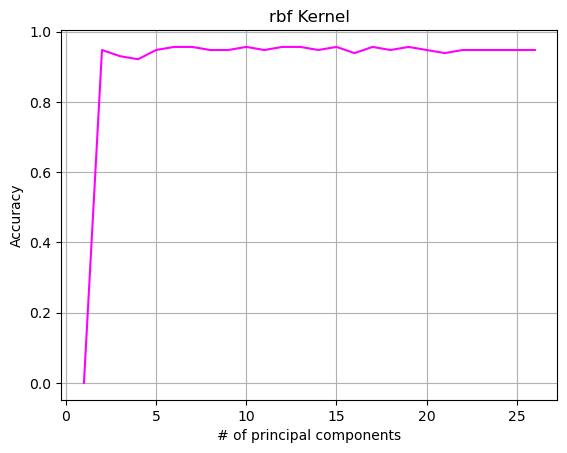

In [7]:
plt.plot(range(1, iterations + 2), X_3, color='magenta')
plt.grid()
plt.xlabel('# of principal components')
plt.ylabel('Accuracy')
plt.title('rbf Kernel')

Text(0.5, 1.0, 'sigmoid Kernel')

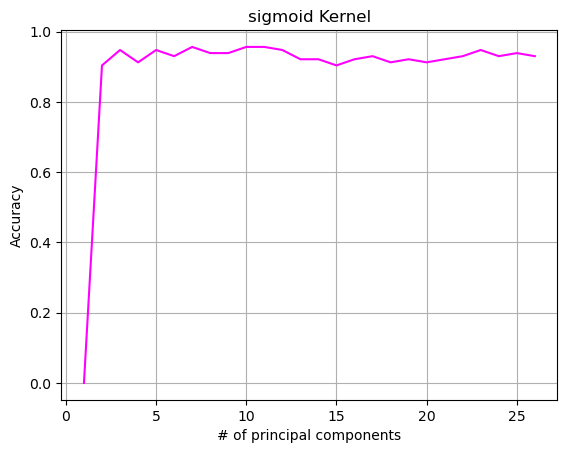

In [8]:
plt.plot(range(1, iterations + 2), X_4, color='magenta')
plt.grid()
plt.xlabel('# of principal components')
plt.ylabel('Accuracy')
plt.title('sigmoid Kernel')

# Problem 2

In [55]:
housing = pd.DataFrame(pd.read_csv("housing.csv"))

In [56]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [57]:
#housing.values[:,:]
varlist = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

def binary_map(x):
    return x.map({'yes': 1, "no": 0})

housing[varlist] = housing[varlist].apply(binary_map)

In [58]:
housing

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,unfurnished
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,semi-furnished
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,unfurnished
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,furnished


In [59]:
y = housing.pop('price')
X = housing.copy()
del X['furnishingstatus']

In [60]:
y.shape

(545,)

In [61]:
X.shape

(545, 11)

In [67]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
#y = scaler.fit_transform(y)

In [63]:
svr_rbf = SVR(kernel='rbf', C=1, gamma=0.1)
svr_lin = SVR(kernel='linear', C=1)
svr_poly = SVR(kernel='poly', C=1, degree=2)

y_rbf = svr_rbf.fit(X, y).predict(X)
y_lin = svr_lin.fit(X, y).predict(X)
y_poly = svr_poly.fit(X, y).predict(X)


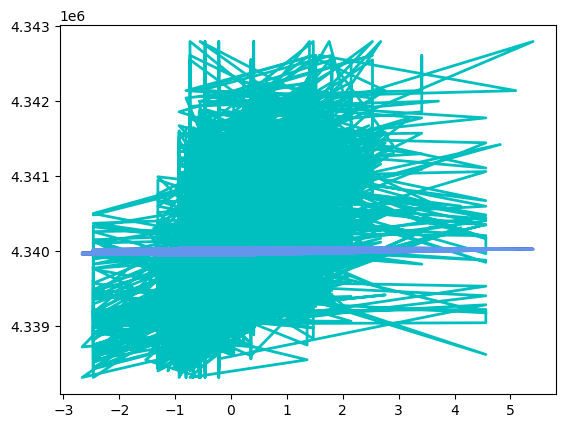

In [68]:
lw = 2
#plt.scatter(X, y, color='darkorange', label='data')
plt.plot(X, y_rbf, color='navy', lw=lw, label='RBF model')
plt.plot(X, y_lin, color='c', lw=lw, label='Linear model')
plt.plot(X, y_rbf, color='cornflowerblue', lw=lw, label='Polynomial model')